### Testing RFLab Queue 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data.datautils import get_first_batch, create_probability_map
from radio.data.datavisualization import plot_batch

#### Setup Data

In [11]:
# Load pre-stored data from train/test/val folders 
data = rio.data.RFLabPatchDataModule(
    root="/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies",
    study="RFLab_test",
    subj_dir="radio_7T_MPR/unprocessed",
    data_dir="",
    use_augmentation=False,
    use_preprocessing=True,
    resample=False,
    batch_size=4,
    modalities=["7T_MPR"],
    labels=[],
    dims=None,
    patch_size=(304, 392, 1),
    create_custom_probability_map=True,
    queue_max_length=300,
    samples_per_volume=10,
)
data.prepare_data()
data.setup(stage='fit')

In [12]:
print(f"Training: {data.size_train} patches.")
print(f"Validation: {data.size_val} patches.")

Training: 100 patches.
Validation: 20 patches.


#### Get a Train and a Test Batch

In [13]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()

In [14]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
val_batch = get_first_batch(val_dataloader)

/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/torchio/data/image.py:131: UserWarning: Not specifying the image type is deprecated and will be mandatory in the future. You can probably use tio.ScalarImage or tio.LabelMap instead
  warnings.warn(


In [16]:
print(f"Batch Keys: {train_batch.keys()}")
print(f"7T_MPR Shape: {train_batch['7T_MPR']['data'].shape}")
print(f"7T_MPR keys: {train_batch['7T_MPR'].keys()}")
print(f"Subject IDs: {train_batch['subj_id']}")
print(f"Location Shape: {train_batch['location'].shape}")

Batch Keys: dict_keys(['subj_id', 'field', '7T_MPR', 'sampling_map', 'location'])
7T_MPR Shape: torch.Size([4, 1, 304, 392, 1])
7T_MPR keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])
Subject IDs: ['HBI_350021_2-20160418103914', 'SCD-6XX-20171115161837', '0575ma72-20190508100311', '0008-20171011161114']
Location Shape: torch.Size([4, 6])


#### Plot Example Samples from Batches

Subject: 1


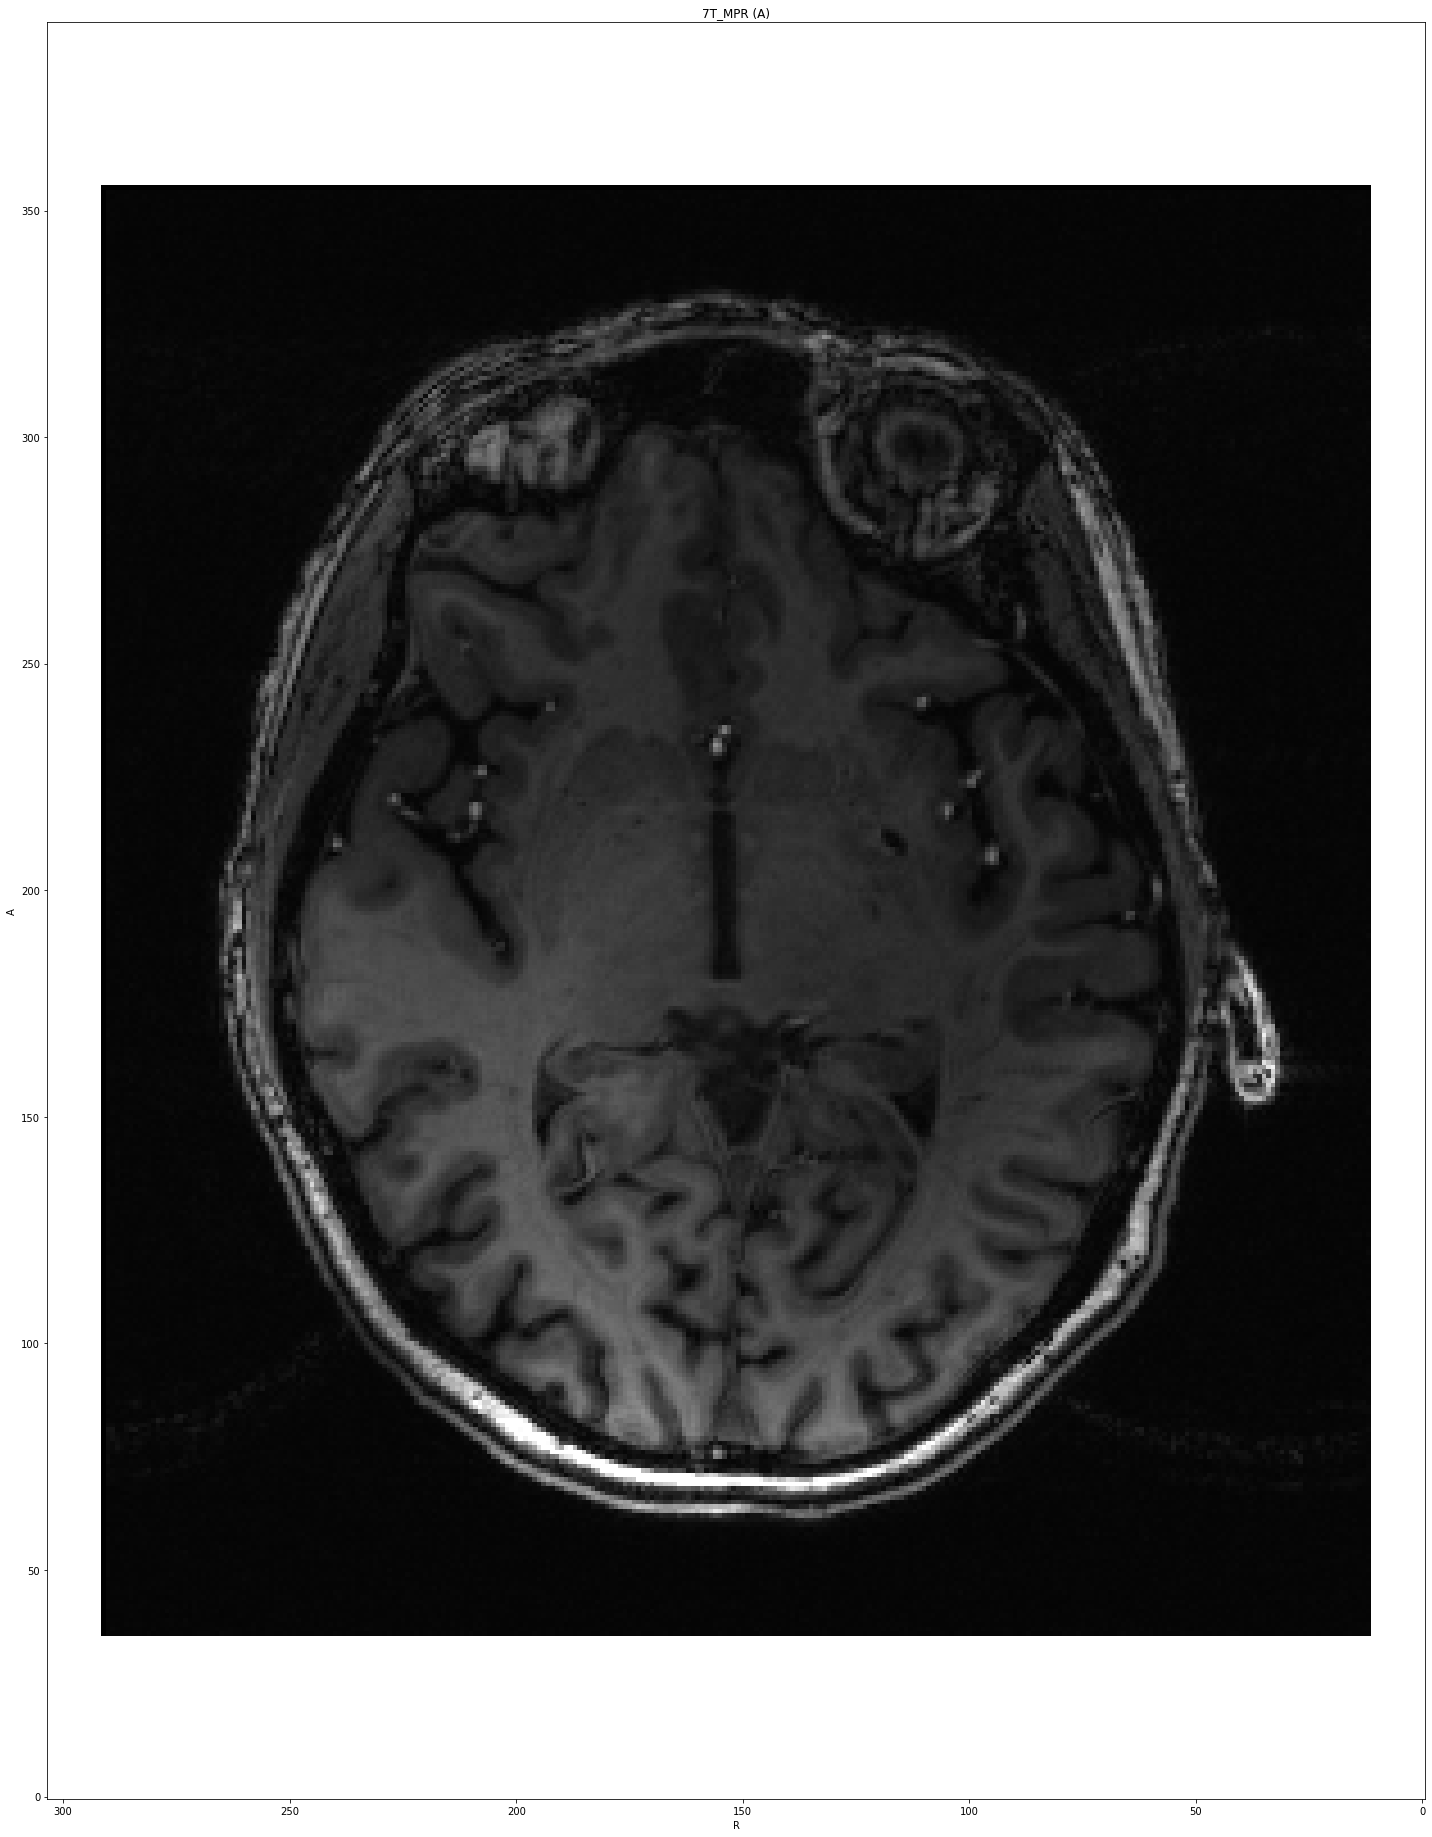



Subject: 2


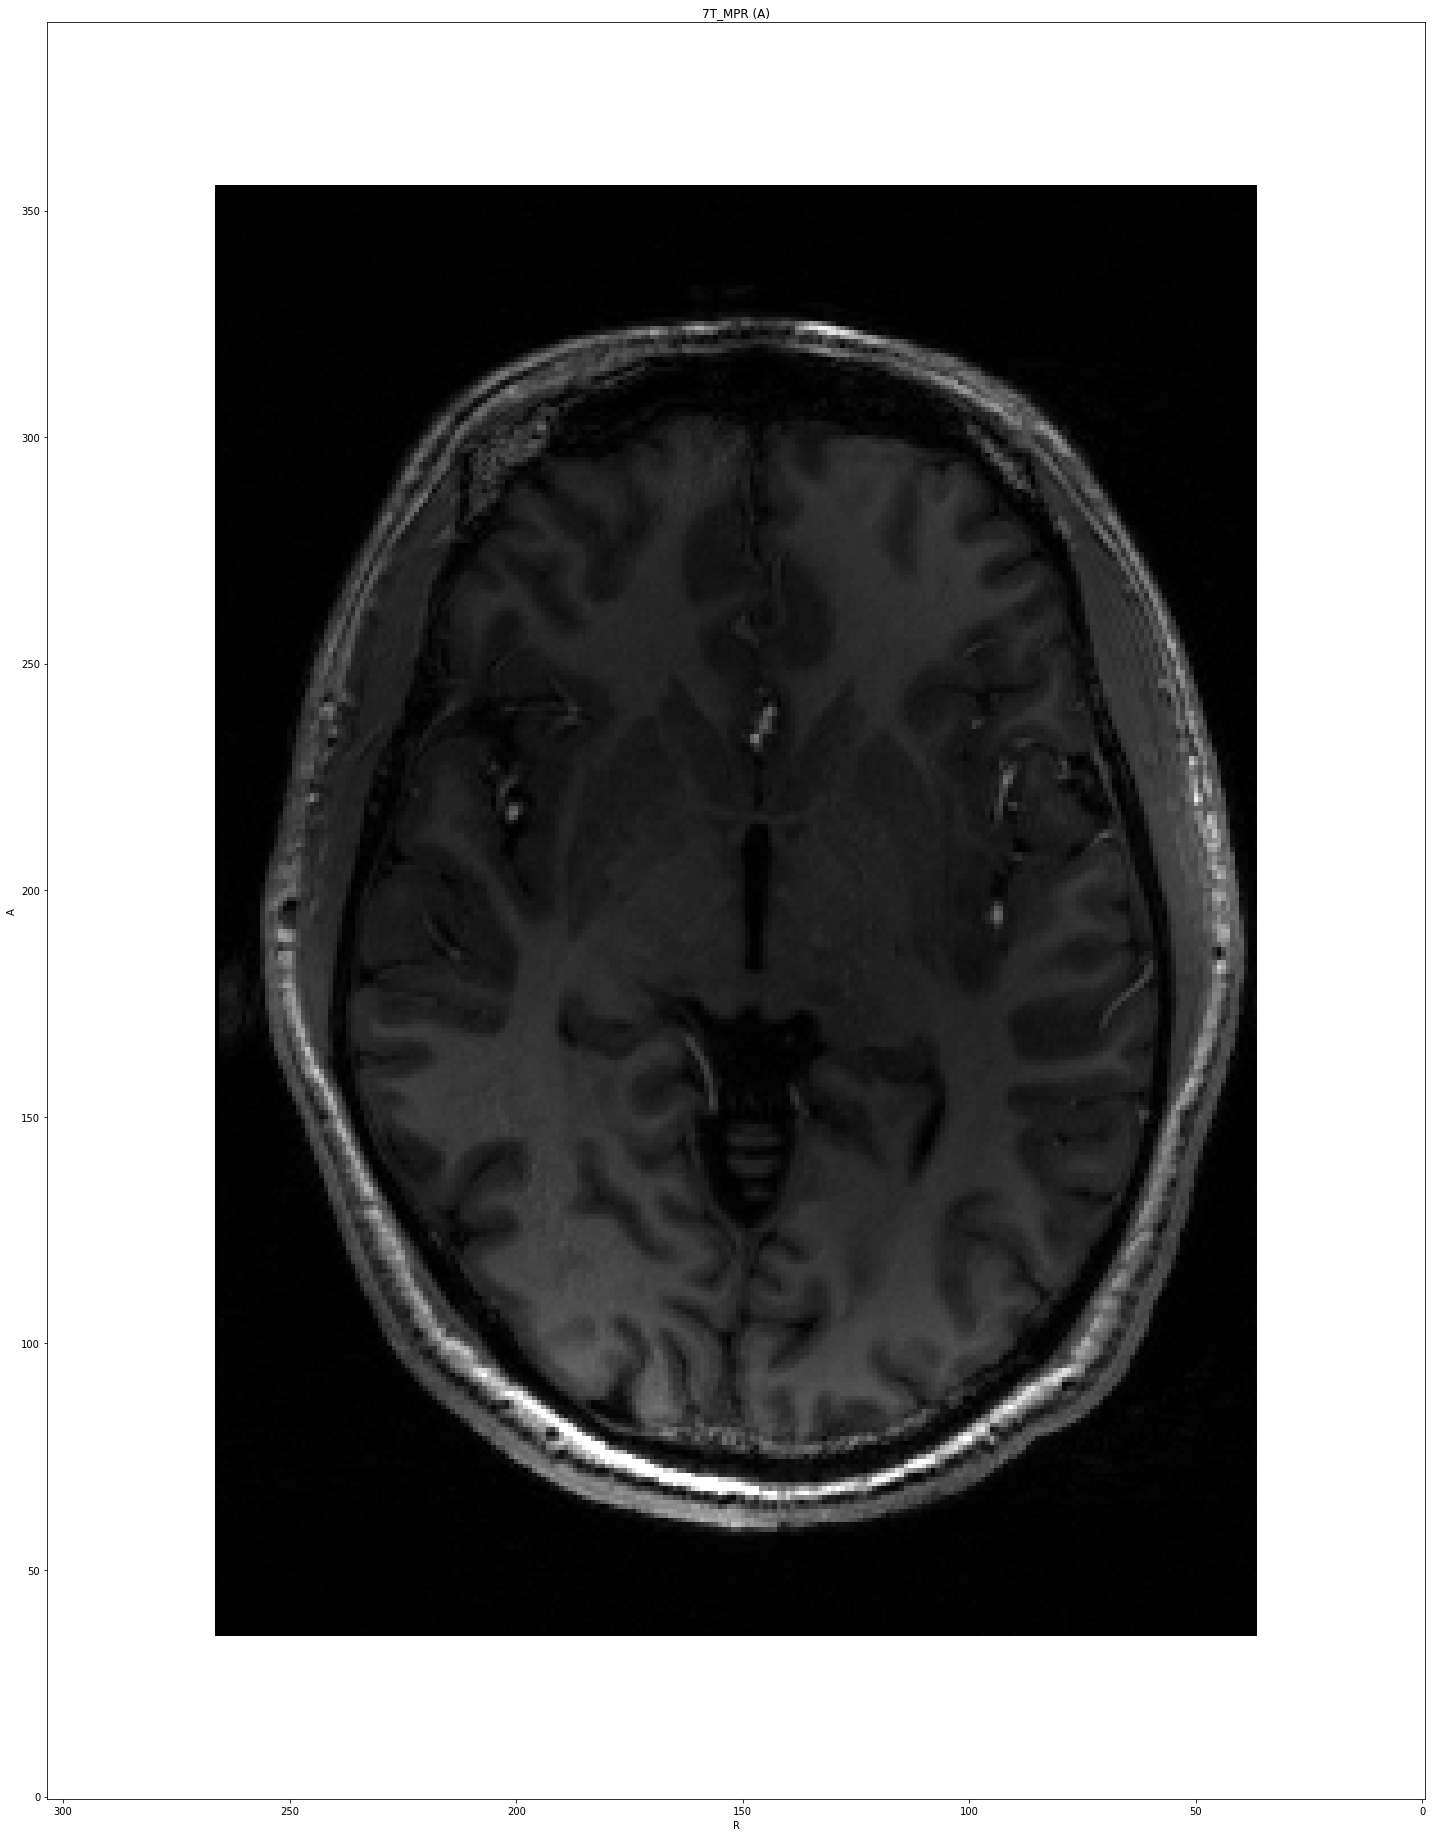



Subject: 3


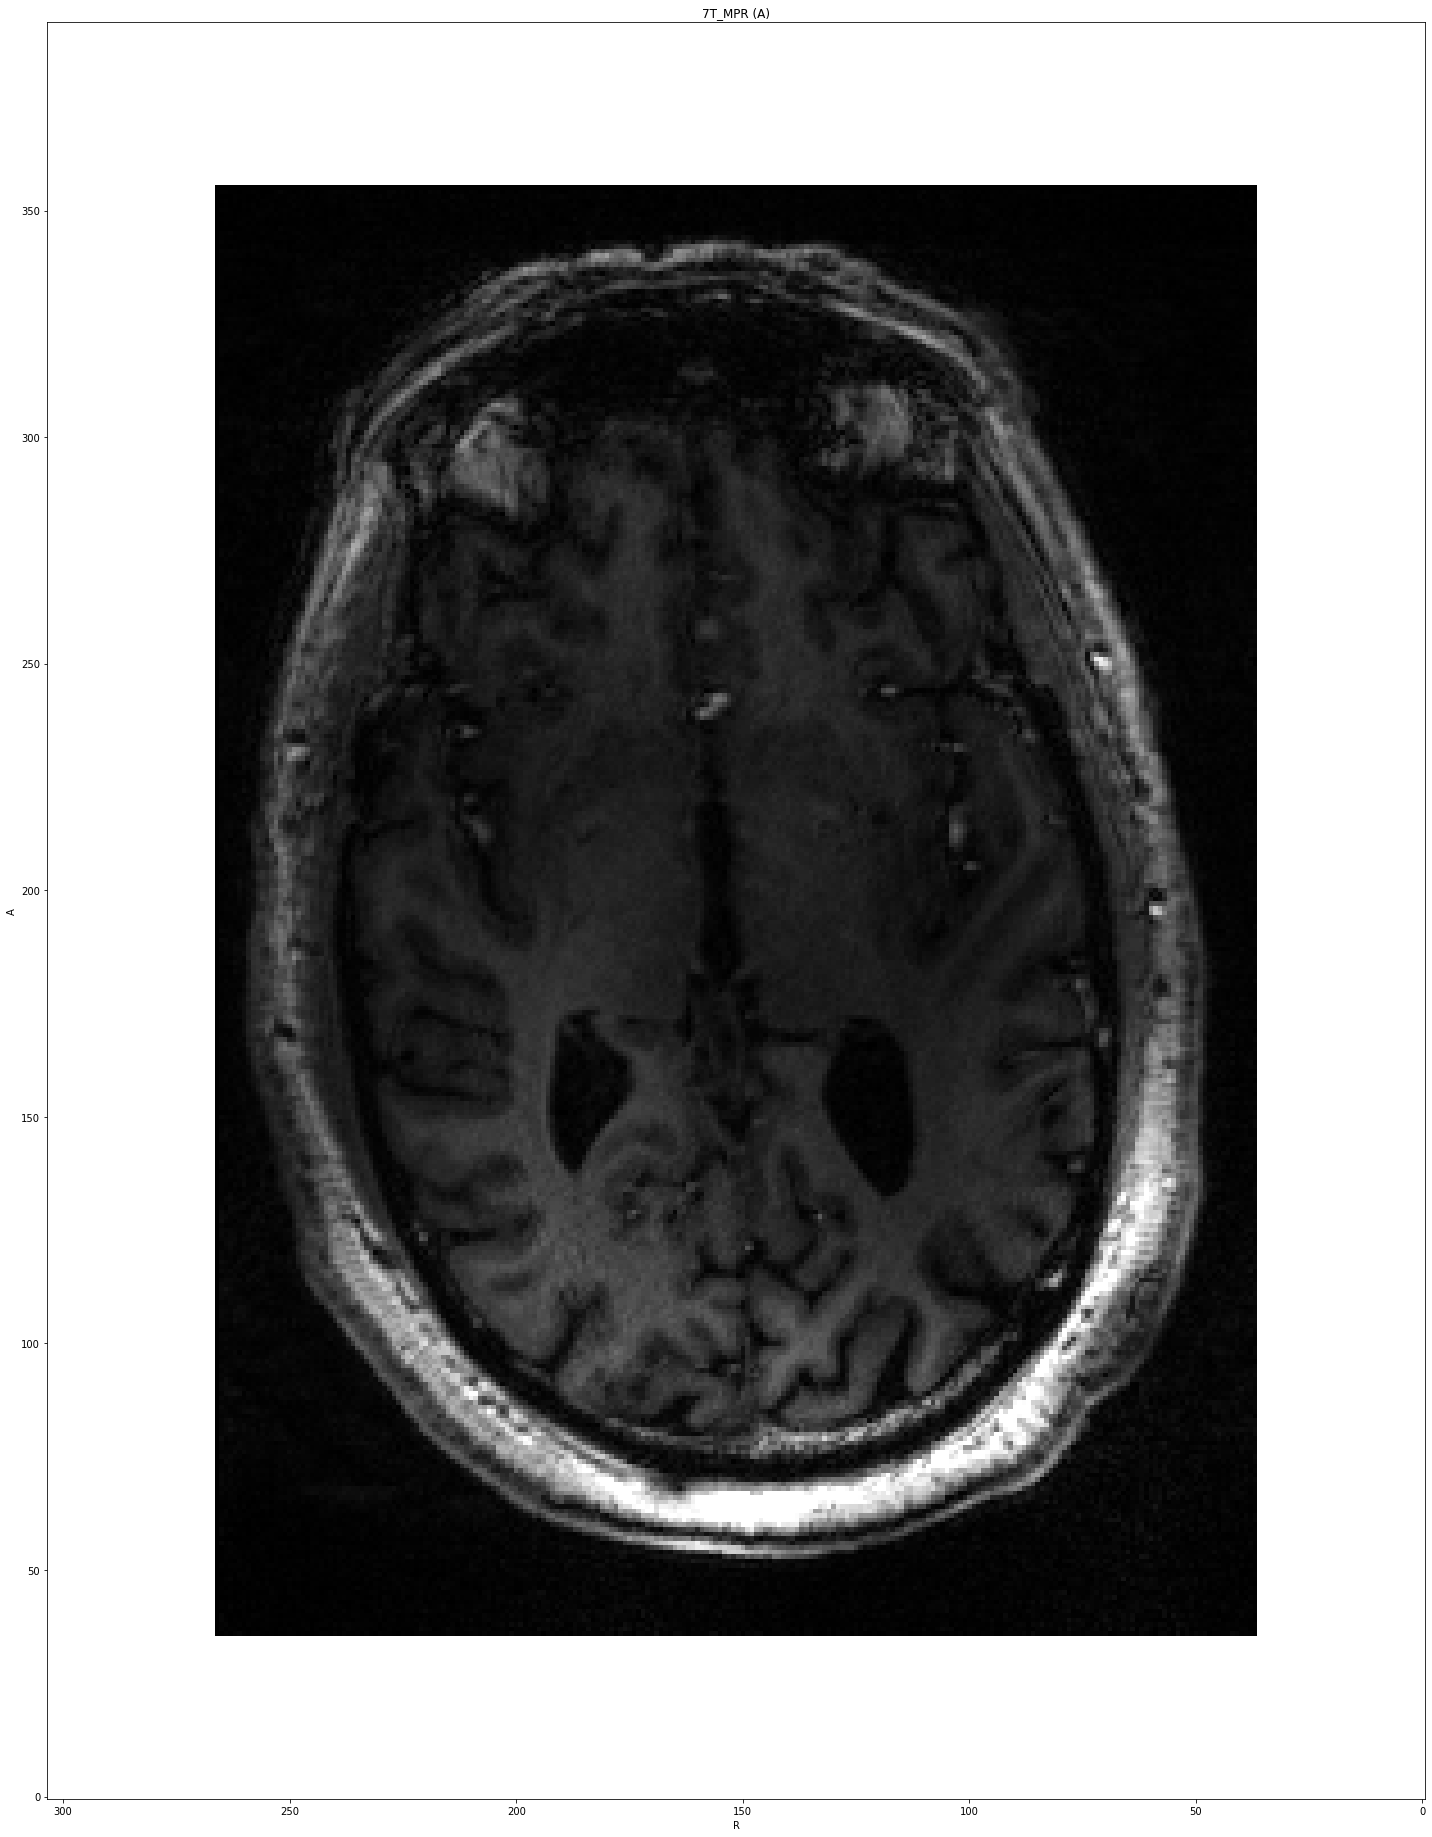



Subject: 4


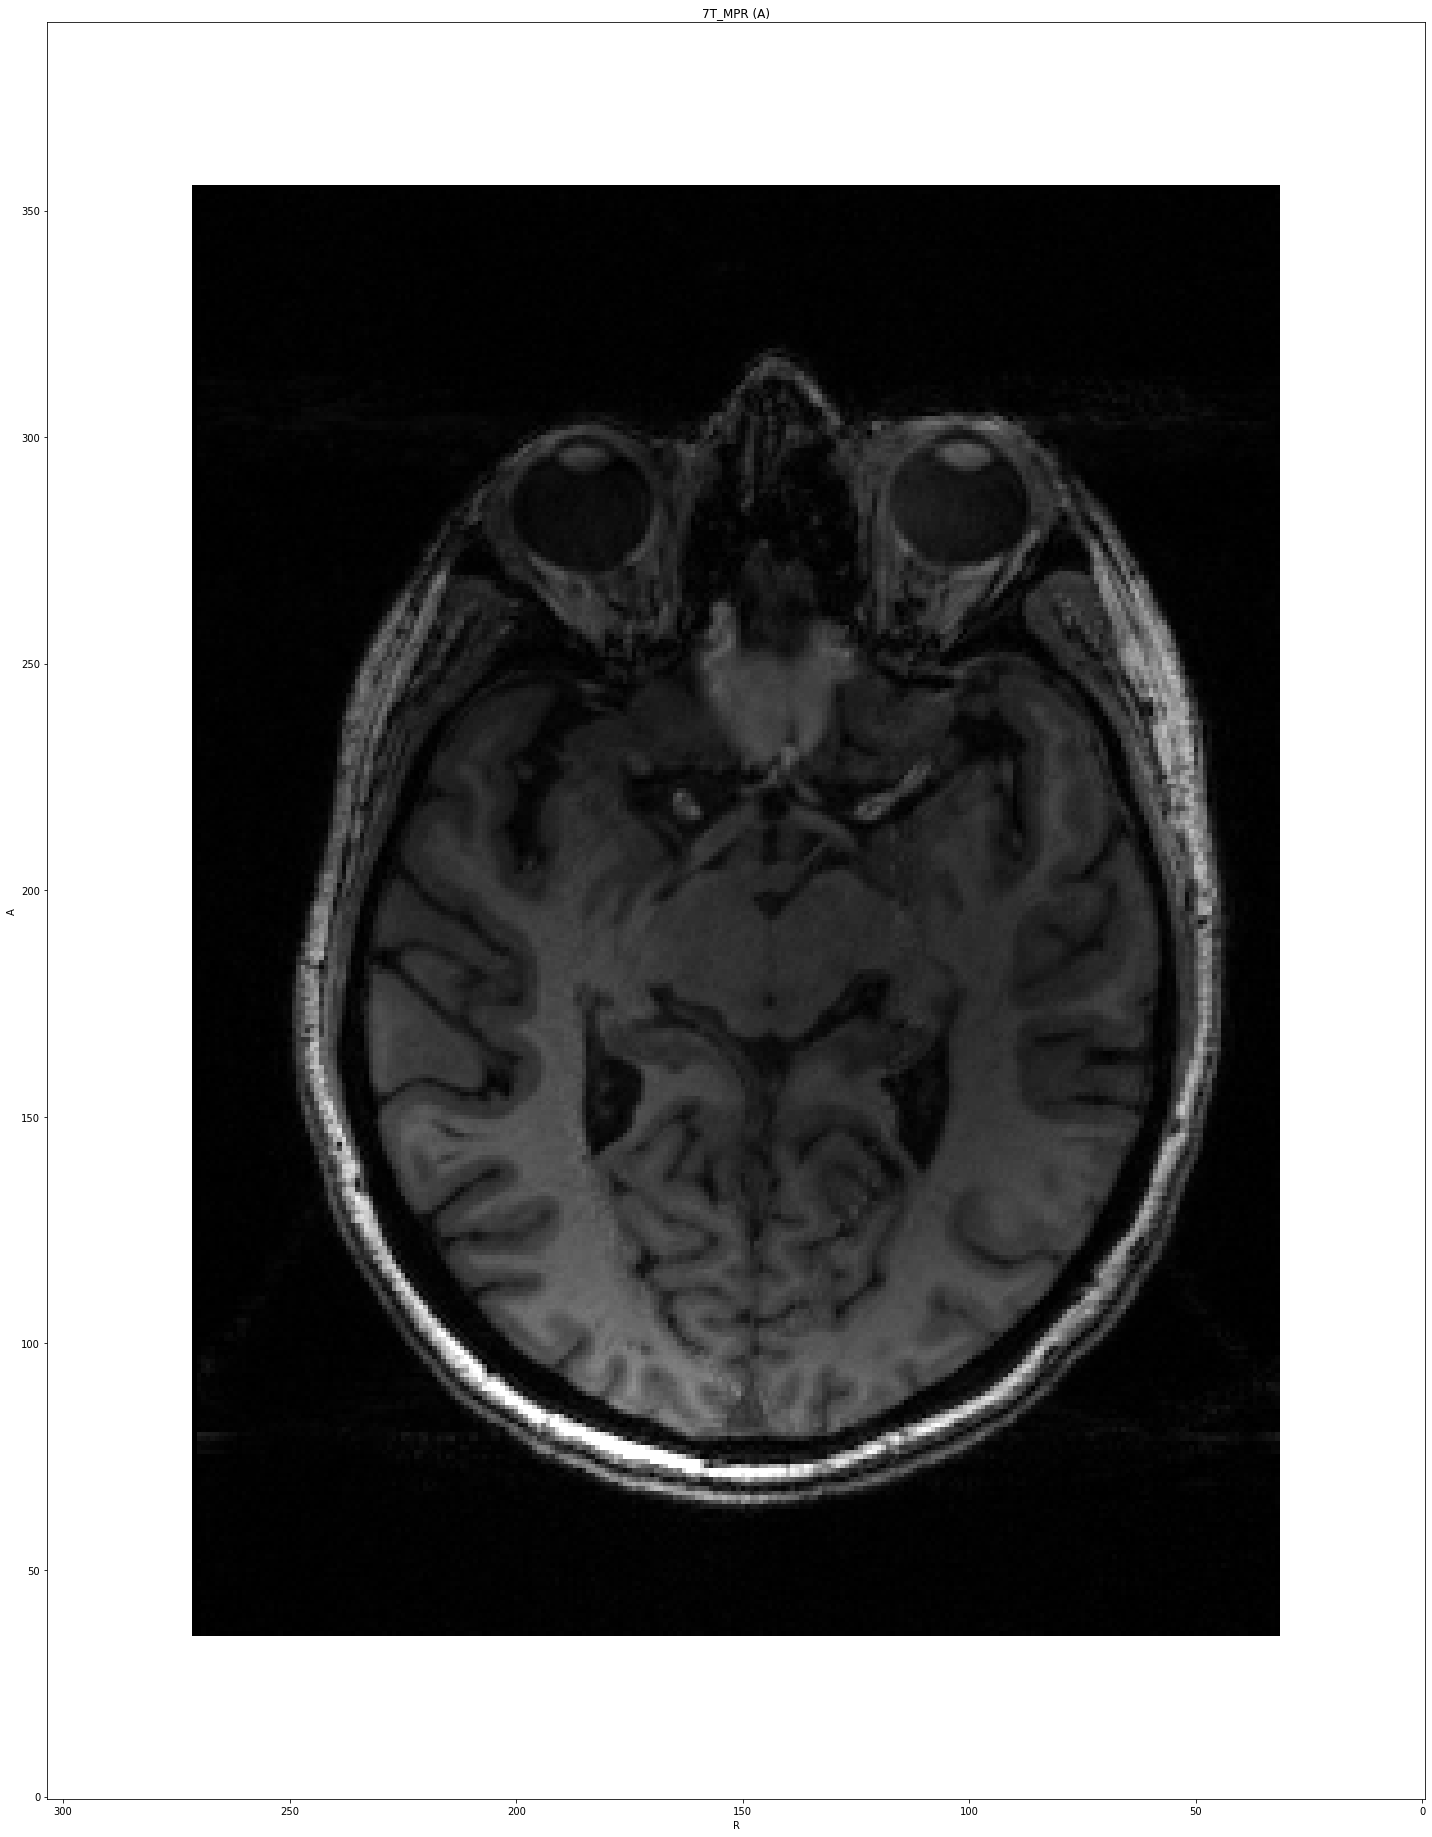

In [17]:
plot_batch(train_batch)